<a href="https://colab.research.google.com/github/TAUforPython/denoising/blob/main/Hilbert_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import hilbert, chirp
from scipy.fft import fft, ifft, fftshift, fftfreq

In [ ]:
def my_func_hilbert(x):
    N = len(x)
    xf = fft(x)
    xf[1:N//2] *= 2
    if N % 2 == 1:
        xf[N//2] *= 2
    xf[N//2 + 1:] = 0
    xa = ifft(xf)
    assert np.allclose(xa.real, x)
    return xa

In [ ]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 60*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)
signal = chirp(t, 20.0, t[-1], 100.0)
#signal *= (np.cos(1.0 * 2.0*np.pi*t) + 0.1 * np.cos(12.0 * 2.0*np.pi*t) + 1*np.cos(3.0 * 2.0*np.pi*t))
signal *= (1 + np.cos(3.0 * 2.0*np.pi*t))

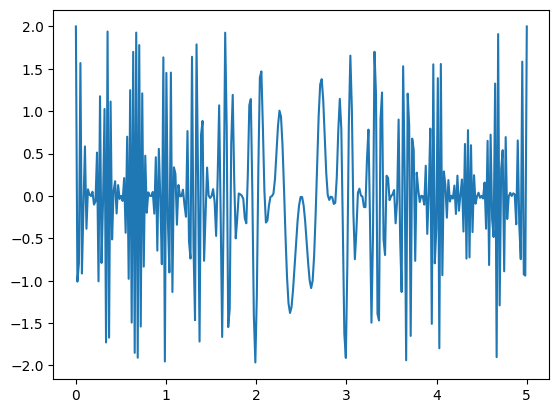

In [ ]:
plt.plot(t, signal)

In [ ]:
signal_fft = fft(signal)
signal_freq = fftfreq(t.shape[-1],t[1]-t[0])
freq_edge = np.where(signal_freq > 20)[0][0]
freq_edge = len(signal_freq)
signal_freq = signal_freq[0:freq_edge]
signal_fft = signal_fft[0:freq_edge]
power_fft = np.abs(signal_fft)
plt.stem(signal_freq, power_fft,'o')
plt.plot(signal_freq, power_fft)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


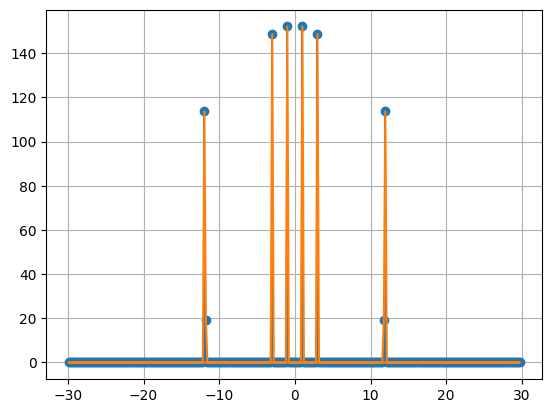

In [ ]:
# define the cut-off frequency
cut_off_amp = 15

# FFT amplitudes where the absolute value less
# than the cut-off amplitude = 0
signal_fft[np.where(np.abs(signal_fft) < cut_off_amp)[0]] = 0
signal_fft[np.where(np.real(signal_fft) < 0)[0]] = 0

plt.stem(signal_freq, signal_fft,'o')
plt.plot(signal_freq, signal_fft)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


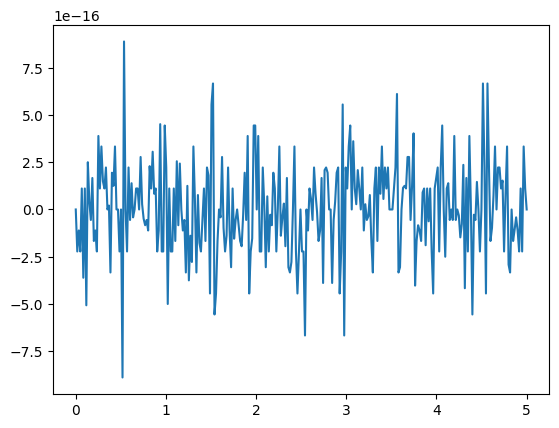

In [ ]:
xa = ifft(signal_fft)
plt.plot(t, xa-signal)


In [ ]:
# Создаем сигнал
t = np.linspace(0, 10, 500, endpoint=False)  # временные отсчеты
signal = np.cos(2 * np.pi * 5 * t) + 1 * np.sin(2 * np.pi / 2 * t) # пример синусоидального сигнала


In [ ]:
# https://dsp.stackexchange.com/questions/76754/how-to-alleviate-the-edging-effect-of-the-hilbert-transform
signal_pad = np.pad(signal, len(signal), mode='reflect')
xpa = my_func_hilbert(signal_pad)

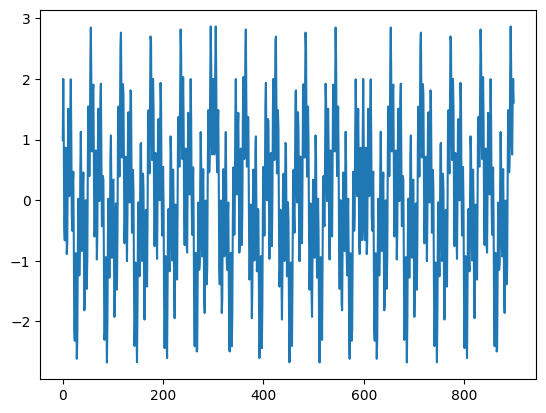

In [ ]:
plt.plot(xpa)
#plt.plot(signal)
#plt.plot(analytic_signal)
plt.show()

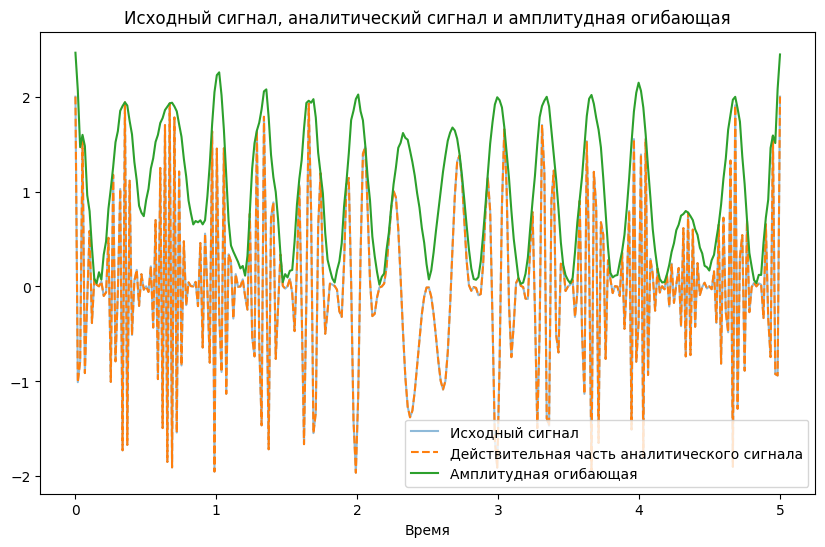

In [ ]:
# Применяем преобразование Гильберта
analytic_signal = my_func_hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)  # Используем амплитуду для амплитудной огибающей

# Визуализация
plt.figure(figsize=(10, 6))

plt.plot(t, signal, label='Исходный сигнал', alpha=0.5)
plt.plot(t, np.real(analytic_signal), label='Действительная часть аналитического сигнала', linestyle='--')
#plt.plot(t, np.imag(analytic_signal), label='Мнимая часть аналитического сигнала', linestyle='--')
plt.plot(t, amplitude_envelope, label='Амплитудная огибающая')


plt.title('Исходный сигнал, аналитический сигнал и амплитудная огибающая')
plt.xlabel('Время')
plt.legend()

plt.show()

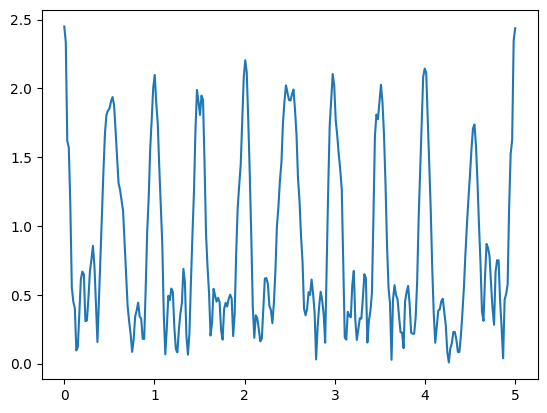

In [ ]:
x_envelop = np.sqrt(np.real(analytic_signal)**2 + np.imag(analytic_signal)**2)
plt.plot(t, x_envelop)

In [ ]:
from scipy.signal import butter, filtfilt
def FilteredSignal(signal, fs, cutoff):
    B, A = butter(1, cutoff / (fs / 2), btype='low')
    filtered_signal = filtfilt(B, A, signal, axis=0)
    return filtered_signal

In [ ]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
cutoff = fs/10
filteredSignal = FilteredSignal(amplitude_envelope, fs, cutoff)

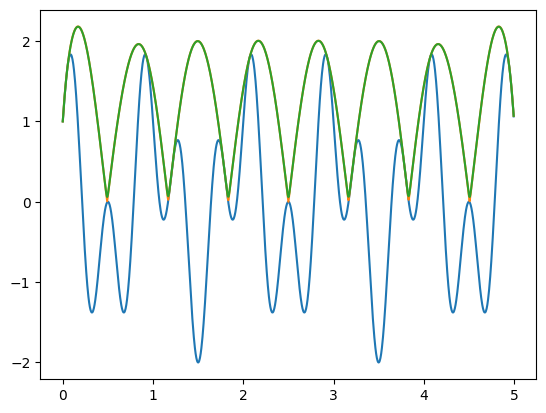

In [ ]:
plt.plot(t, analytic_signal.real)
#plt.plot(analytic_signal.imag)
plt.plot(t, amplitude_envelope)
plt.plot(t, filteredSignal)

#plt.plot(t, signal, label='signal')
#plt.plot(t, amplitude_envelope, label='envelope')
plt.show()

# пример модуляции сигнала


In [ ]:
def create_envelope(num_samples,fL_hz=100,N=1000,beta=3):
    # we will create the envelope by low pass filtering white noise
    mean = 0
    std = 1
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    x = np.random.normal(mean, std, size=num_samples)
    x = signal.filtfilt(taps, 1,x)
    x = (x-np.min(x))
    x = x/np.max(x)
    return x
def create_carrier_harmonic(fs=8e3,fc=200,num_samples=1000,ncomps=1):
    # this will create a harmonic carrier with ncomps harmonics
    x = []
    for i in range(ncomps):
        x.append(np.sin(2*np.pi*(i+1)*fc*np.arange(0,num_samples,1)/fs))
    x = sum(x)
    x = x/np.max(np.abs(x))
    return x
def create_carrier_noise(mean=0,std=1,num_samples=1000):
    # this will create a white noise carrier
    x = np.random.normal(mean, std, size=num_samples)
    x = x/np.abs(x)
    return x

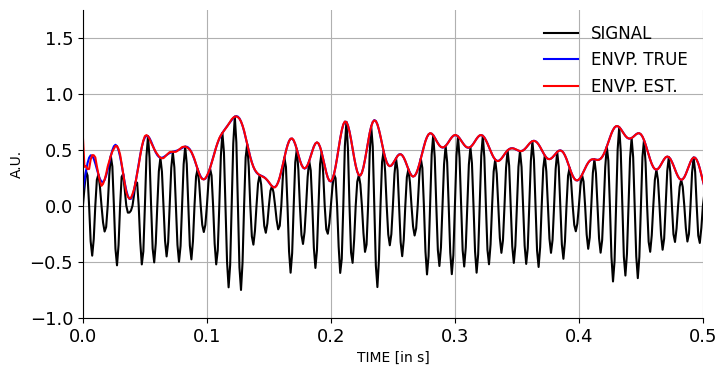

In [ ]:
# init filter and signal params
fs = 8e2
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta)
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=1)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)

fig = plt.subplots(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.plot(t,x,color='black',label='SIGNAL')
ax.plot(t,envelope,color='blue',label='ENVP. TRUE')
ax.plot(t,envelope_hat,color='red',label='ENVP. EST.')
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('A.U.')
ax.legend(loc='upper right',frameon=False,fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-1,1.75)
plt.show()